No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


                                                text emotion_label  \
0                I am stressed about my exams today.      NEGATIVE   
1           Feeling excited about my novel progress!      POSITIVE   
2              I feel sad after a bad day at school.      NEGATIVE   
3            Happy because I finished my AI project.      POSITIVE   
4  Nervous but motivated for the MUN.I am nervous...      NEGATIVE   

   confidence_score  
0          0.997275  
1          0.999811  
2          0.999438  
3          0.999831  
4          0.991510  


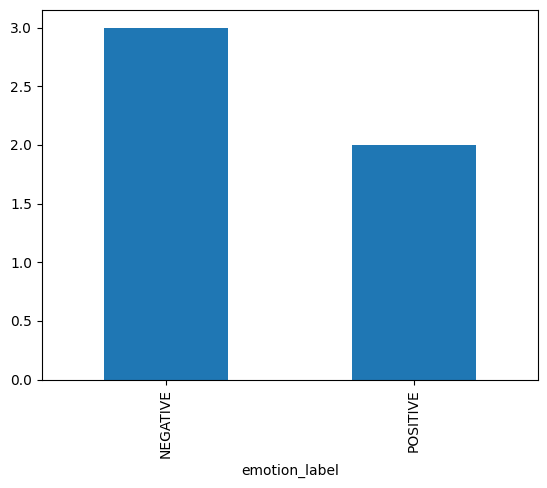

In [ ]:
# Install dependencies (only runs once)
!pip install transformers torch pandas

# Import libraries
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Your own text data
data = {
    "text": [
        "I am stressed about my exams today.",
        "Feeling excited about my novel progress!",
        "I feel sad after a bad day at school.",
        "Happy because I finished my AI project.",
        "Nervous but motivated for the MUN."
        "I am nervous as well as exited for the upcoming match."
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Load sentiment/emotion model
emotion_model = pipeline("sentiment-analysis")

# Analyze each sentence
results = []
for sentence in df["text"]:
    res = emotion_model(sentence)[0]
    results.append(res)

# Add results to DataFrame
df["emotion_label"] = [r["label"] for r in results]
df["confidence_score"] = [r["score"] for r in results]

# Show the results table
print(df)

# Optional: Plot a bar chart of emotions
df['emotion_label'].value_counts().plot(kind='bar')
plt.show()